In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from helpers.clear_data import clear_data
from helpers.enrich_data import enrich_data, enriched_column_names
from helpers.get_data import get_data
from helpers.mapper import mapper

data = get_data(r'C:\Users\rodri\OneDrive\Documentos\Repos\rBressanS\projeto-aplicado\data')
data['driver_a']['route_a']['trip_1'].head()


,time,Aceleração (m/s²),Altitude (GPS) (m),Distância percorrida (km),Distância percorrida (total) (km),Espaço livre no tanque de combustível (L),Nível de combustível (%) (%),Nível de combustível (V) (L),Posição do pedal do acelerador D (%),Posição do pedal do acelerador E (%),...,RPM do motor x1000 (rpm),Temperatura do líquido de \r\narrefecimento do motor (℃),Velocidade (GPS) (km/h),Velocidade do veículo (km/h),Velocidade média (km/h),Velocidade média (GPS) (km/h),Latitude,Longtitude,Unnamed: 19,file
time,,,,,,,,,,,,,,,,,,,,,
1900-01-01 19:32:20,19:32:24.282,NaN,799.126881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,NaN,NaN,0.000015,-23.556263,-46.896093,NaN,data_1.csv
1900-01-01 19:32:25,19:32:29.820,NaN,811.105744,0.00000,35.041601,38.5,23.0,11.5,20.0,9.0,...,1.0,88.0,3.678464,0.0,NaN,0.025677,-23.556227,-46.896099,NaN,data_1.csv
1900-01-01 19:32:30,19:32:34.930,0.000000,815.000000,0.00000,35.041601,38.5,23.0,11.5,20.0,9.0,...,0.8,87.0,0.000000,0.0,0.000000,0.460593,-23.556204,-46.896175,NaN,data_1.csv
1900-01-01 19:32:35,19:32:39.850,0.000000,808.822893,0.00000,35.041601,39.0,22.0,11.0,20.0,9.0,...,0.8,87.0,0.000000,0.0,0.000000,0.369647,-23.556274,-46.896117,NaN,data_1.csv
1900-01-01 19:32:40,19:32:44.970,0.127958,808.662864,0.00065,35.042250,39.0,22.0,11.0,20.0,9.0,...,0.8,87.0,0.000000,2.0,0.154407,0.283889,-23.556274,-46.896117,NaN,data_1.csv


In [3]:
clean_data = mapper(clear_data, data)
enriched_data = mapper(enrich_data, clean_data)
df: pd.DataFrame = None
for driver in enriched_data:
    for route in enriched_data[driver]:
        for trip_name in enriched_data[driver][route]:
            trip = enriched_data[driver][route][trip_name]
            trip["driver"] = driver
            trip["route"] = route
            trip["trip"] = trip_name
            if df is None:
                df = trip
            else:
                df = pd.concat([df, trip])

<Axes: title={'center': 'aceleracao_calculada_absoluta'}, xlabel='[driver]'>

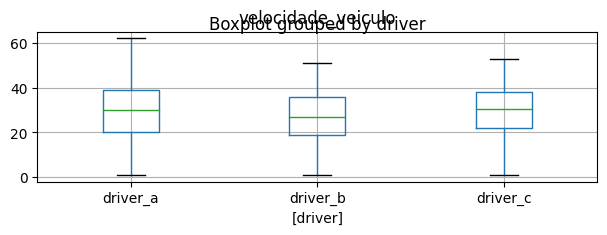

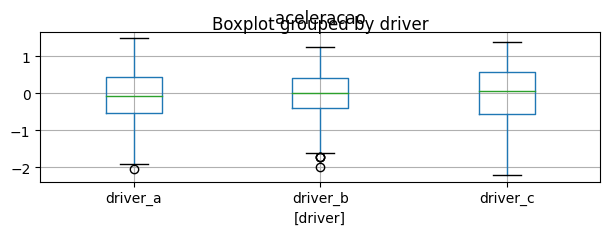

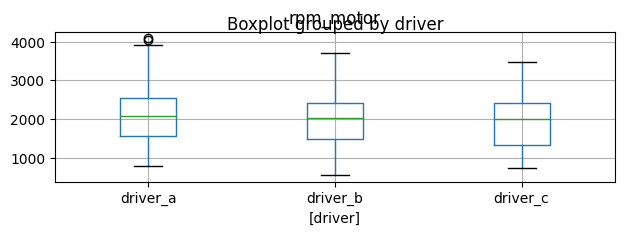

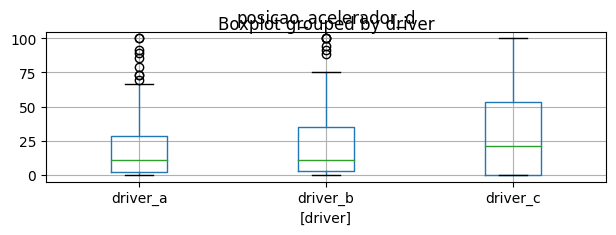

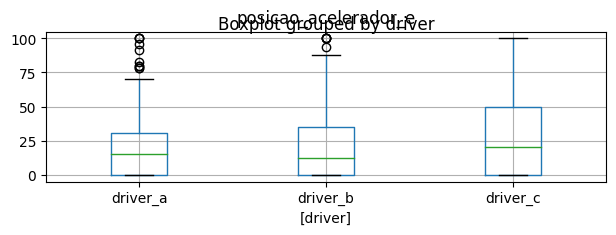

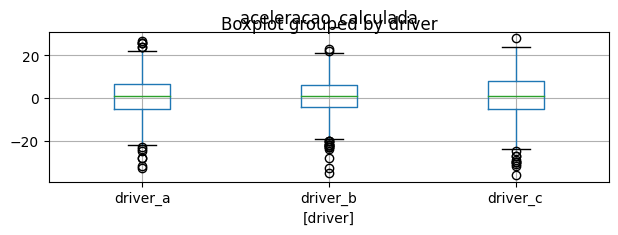

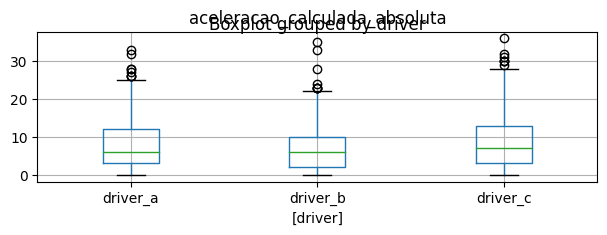

In [ ]:
df.boxplot(column=[enriched_column_names.velocidade_veiculo], by=['driver'], figsize=(7,2),)
df.boxplot(column=[enriched_column_names.aceleracao], by=['driver'], figsize=(7,2))
df.boxplot(column=[enriched_column_names.rpm_motor], by=['driver'], figsize=(7,2))
df.boxplot(column=[enriched_column_names.posicao_acelerador_d], by=['driver'], figsize=(7,2))
df.boxplot(column=[enriched_column_names.posicao_acelerador_e], by=['driver'], figsize=(7,2))
df.boxplot(column=[enriched_column_names.aceleracao_calculada], by=['driver'], figsize=(7,2))
df.boxplot(column=[enriched_column_names.aceleracao_calculada_absoluta], by=['driver'], figsize=(7,2))

In [ ]:
from helpers.aggregate_data import agg_data

aggregated_data = mapper(agg_data, enriched_data)

In [ ]:
df_agg: pd.DataFrame = None
for driver in aggregated_data:
    for route in aggregated_data[driver]:
        for trip_name in aggregated_data[driver][route]:
            trip = aggregated_data[driver][route][trip_name]
            trip["driver"] = driver
            # trip["route"] = route
            # trip["trip"] = trip_name
            if df_agg is None:
                df_agg = trip
            else:
                df_agg = pd.concat([df_agg, trip])

df_agg

statistic_variable,aceleracao_calculada_min,aceleracao_calculada_max,aceleracao_calculada_mean,aceleracao_calculada_std,aceleracao_calculada_q1,aceleracao_calculada_q2,aceleracao_calculada_q3,aceleracao_calculada_absoluta_min,aceleracao_calculada_absoluta_max,aceleracao_calculada_absoluta_mean,...,velocidade_veiculo_q3,aceleracao_min,aceleracao_max,aceleracao_mean,aceleracao_std,aceleracao_q1,aceleracao_q2,aceleracao_q3,aceleracao_brusca_por_periodo,driver
value,-22.0,24.0,0.220000,9.494860,-6.0,1.0,6.25,0.0,24.0,7.700000,...,38.25,-2.050085,1.361614,-0.063559,0.660605,-0.526389,-0.063596,0.453019,0.125000,driver_a
value,-33.0,27.0,0.415385,10.992348,-5.0,1.0,6.50,0.0,33.0,8.271795,...,39.00,-1.899204,1.489512,-0.073561,0.750345,-0.504505,-0.064723,0.442975,0.169231,driver_a
value,-33.0,22.0,0.293839,9.029708,-5.5,1.0,7.00,0.0,33.0,7.184834,...,35.00,-1.985176,1.125099,-0.044460,0.595393,-0.476738,-0.063113,0.401923,0.066038,driver_b
value,-35.0,19.0,0.438095,8.754956,-4.0,1.0,6.00,0.0,35.0,6.638095,...,37.00,-1.713164,1.252534,-0.000985,0.618007,-0.323864,0.064689,0.447767,0.085714,driver_b
value,-28.0,23.0,0.322870,8.805903,-5.0,1.0,6.00,0.0,28.0,6.825112,...,34.00,-1.716341,1.154148,-0.038227,0.595509,-0.436409,0.000000,0.383382,0.080717,driver_b
value,-36.0,28.0,0.580311,11.698247,-5.0,2.0,7.00,0.0,36.0,8.963731,...,39.00,-2.201620,1.389036,-0.012501,0.811298,-0.519375,0.129212,0.583966,0.181347,driver_c
value,-30.0,20.0,0.441026,10.865170,-5.0,1.0,8.00,0.0,30.0,8.461538,...,37.00,-2.053798,1.373804,-0.048325,0.819267,-0.546775,0.000000,0.522234,0.184615,driver_c


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
scaler = StandardScaler()

# Define your target variable and features
y = le.fit_transform(df_agg['driver'])
X = df_agg.drop('driver', axis=1)
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Initialize the model
# model = SVR(kernel='rbf', C=1.0, epsilon=0.2)
model = LogisticRegression(random_state=0)

# Train the model
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Calculate the mean squared error of the predictions
# mse = mean_squared_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# print(f'Mean Squared Error: {mse}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
